1. Importa correctamente los conjuntos de datos, desplegando la cantidad de registros
de cada categoría para cada conjunto. Despliega ocho imágenes aleatorias del
conjunto de entrenamiento y codifica las etiquetas con OneHotEncoder para los
conjuntos de entrenamiento y Test.

Train X shape: (14034, 32, 32, 3)
Train y shape: (14034,)
Test X shape: (3000, 32, 32, 3)
Test y shape: (3000,)
Prediction X shape: (7301, 32, 32, 3)
Training set categories and counts:
Category buildings: 2191 images
Category forest: 2271 images
Category glacier: 2404 images
Category mountain: 2512 images
Category sea: 2274 images
Category street: 2382 images

Test set categories and counts:
Category buildings: 437 images
Category forest: 474 images
Category glacier: 553 images
Category mountain: 525 images
Category sea: 510 images
Category street: 501 images


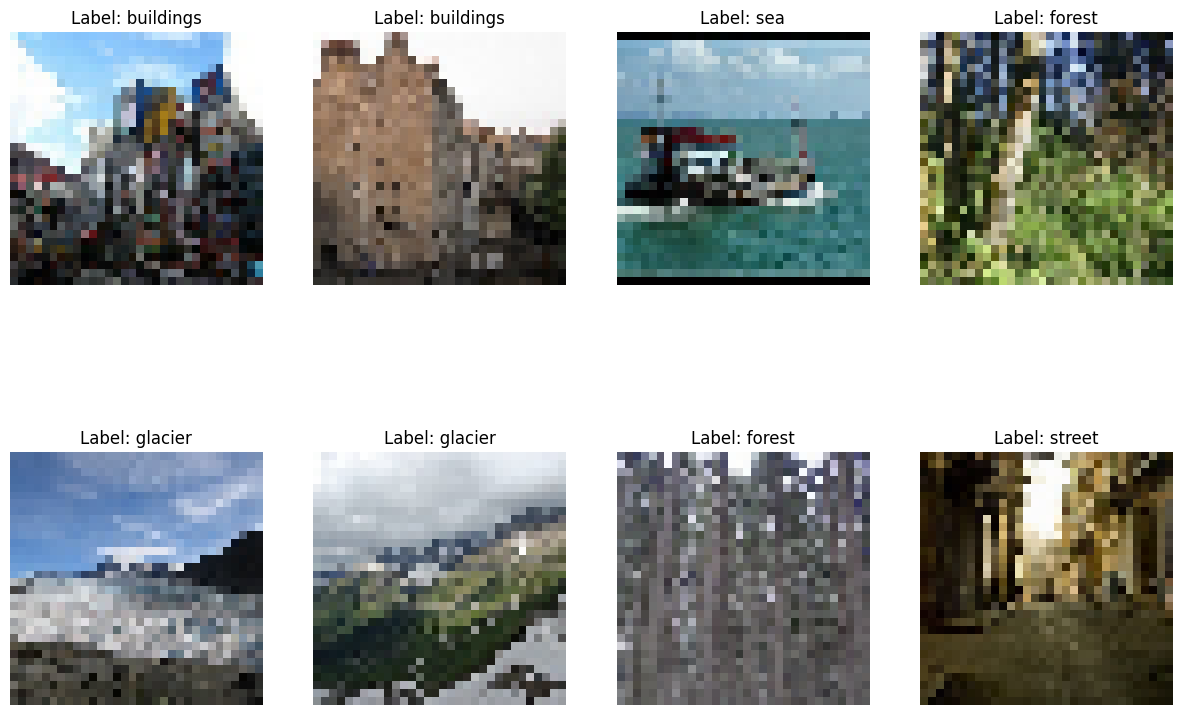

Train y encoded shape: (14034, 6)
Test y encoded shape: (3000, 6)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.callbacks import History



#FernandoSanchez Cargar los datos
train_X = np.load('DataSet/cnn_train_X.npy', allow_pickle=True)
train_y = np.load('DataSet/cnn_train_y.npy', allow_pickle=True)
test_X = np.load('DataSet/cnn_test_X.npy', allow_pickle=True)
test_y = np.load('DataSet/cnn_test_y.npy', allow_pickle=True)
pred_X = np.load('DataSet/cnn_pred_X.npy', allow_pickle=True)

#FernandoSanchez Mostrar la forma de los conjuntos de datos
print(f'Train X shape: {train_X.shape}')
print(f'Train y shape: {train_y.shape}')
print(f'Test X shape: {test_X.shape}')
print(f'Test y shape: {test_y.shape}')
print(f'Prediction X shape: {pred_X.shape}')

#FernandoSanchez Contar la cantidad de registros por categoría en el conjunto de entrenamiento y de test
train_categories, train_counts = np.unique(train_y, return_counts=True)
test_categories, test_counts = np.unique(test_y, return_counts=True)

#FernandoSanchez Mostrar los resultados
print("Training set categories and counts:")
for category, count in zip(train_categories, train_counts):
    print(f'Category {category}: {count} images')

print("\nTest set categories and counts:")
for category, count in zip(test_categories, test_counts):
    print(f'Category {category}: {count} images')

#FernandoSanchez Función para mostrar imágenes aleatorias
def show_random_images(images, labels, num_images=8):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        idx = random.randint(0, len(images) - 1)
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[idx])
        plt.title(f'Label: {labels[idx]}')
        plt.axis('off')
    plt.show()

#FernandoSanchez Mostrar 8 imágenes aleatorias del conjunto de entrenamiento
show_random_images(train_X, train_y)

#FernandoSanchez Codificación de etiquetas
encoder = OneHotEncoder(sparse_output=False)
train_y_encoded = encoder.fit_transform(train_y.reshape(-1, 1))
test_y_encoded = encoder.transform(test_y.reshape(-1, 1))

#FernandoSanchez Mostrar la forma de las etiquetas codificadas
print(f'Train y encoded shape: {train_y_encoded.shape}')
print(f'Test y encoded shape: {test_y_encoded.shape}')



2. Implementa una red neuronal multicapa Fully Connected para clasificar las
imágenes, las que deben contener un mínimo de cinco capas ocultas. Despliega las métricas (aplicadas al conjunto de test) que estimes conveniente para medir el
rendimiento del modelo.

In [12]:
#FernandoSanchez Normalizar los valores de píxeles
train_X_normalized = train_X / 255.0
test_X_normalized = test_X / 255.0

#FernandoSanchez Mostrar la forma de los datos normalizados
print(f'Train X normalized shape: {train_X_normalized.shape}')
print(f'Test X normalized shape: {test_X_normalized.shape}')

#FernandoSanchez Definición del modelo CNN básico
model_cnn_basic = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])

#FernandoSanchez Compilación del modelo
model_cnn_basic.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

#FernandoSanchez Resumen del modelo
model_cnn_basic.summary()

#FernandoSanchez Entrenamiento del modelo CNN básico
history_cnn_basic = model_cnn_basic.fit(train_X_normalized, train_y_encoded, epochs=20, batch_size=32, validation_data=(test_X_normalized, test_y_encoded))

#FernandoSanchez Evaluación del modelo en el conjunto de test
test_loss_basic, test_accuracy_basic = model_cnn_basic.evaluate(test_X_normalized, test_y_encoded)
print(f'Test loss (CNN básica): {test_loss_basic}')
print(f'Test accuracy (CNN básica): {test_accuracy_basic}')

#FernandoSanchez Graficar la pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn_basic.history['loss'], label='Train Loss')
plt.plot(history_cnn_basic.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

#FernandoSanchez Graficar la precisión
plt.subplot(1, 2, 2)
plt.plot(history_cnn_basic.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn_basic.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

"""Precisión en el conjunto de entrenamiento: La precisión alcanzada en el conjunto de entrenamiento después de 20 épocas fue aproximadamente 57.49%.
Precisión en el conjunto de validación: La precisión en el conjunto de validación alcanzó alrededor del 60.27%, lo cual indica que el modelo generaliza bien en datos no vistos.
Precisión en el conjunto de prueba: Finalmente, en el conjunto de prueba, el modelo alcanzó una precisión del 60.27% y una pérdida de 1.048."""


Train X normalized shape: (14034, 32, 32, 3)
Test X normalized shape: (3000, 32, 32, 3)


C:\Users\Fernando Sanchez\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,558 (654.52 KB)

 Trainable params: 167,558 (654.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.1736 - loss: 1.7850 - val_accuracy: 0.3743 - val_loss: 1.5276
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.3837 - loss: 1.5086 - val_accuracy: 0.4393 - val_loss: 1.4050
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.4404 - loss: 1.4092 - val_accuracy: 0.4510 - val_loss: 1.3802
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.4746 - loss: 1.3381 - val_accuracy: 0.5170 - val_loss: 1.2424
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.5067 - loss: 1.2783 - val_accuracy: 0.5370 - val_loss: 1.1996
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.5275 - loss: 1.2265 - val_accuracy: 0.5320 - val_loss: 1.2009
Epoch 7/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.5414 - loss: 1.1884 - val_accuracy: 0.5653 - val_loss: 1.1571
Epoch 8/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.5541 - loss: 1.1854 - val_acc

'Después de 10 épocas de entrenamiento, el modelo alcanzó una precisión (accuracy) de aproximadamente 62.21% en los datos de entrenamiento y 57.37% en los datos de validación (test).\nEl valor de pérdida (loss) final en los datos de test fue de aproximadamente 1.097.\nSe generan dos reguladores para ver cual tiene mejor rendimiento (Dropout y L2)'

3. Desarrolla una red neuronal Convolucional usando tres o más capas convolucionales
y dos o más capas densas, de manera que la cantidad de parámetros a estimar se
encuentre en el intervalo [3MM, 8MM], con 25 épocas. Muestra la curva de la pérdida
para cada época y la curva de la métrica accuracy (conjunto test).


C:\Users\Fernando Sanchez\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 488,774 (1.86 MB)

 Trainable params: 488,774 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.1795 - loss: 1.7914 - val_accuracy: 0.2713 - val_loss: 1.7301
Epoch 2/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.3378 - loss: 1.6023 - val_accuracy: 0.4173 - val_loss: 1.4777
Epoch 3/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.4026 - loss: 1.4781 - val_accuracy: 0.4520 - val_loss: 1.3889
Epoch 4/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.4663 - loss: 1.3589 - val_accuracy: 0.5177 - val_loss: 1.2485
Epoch 5/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.5186 - loss: 1.2557 - val_accuracy: 0.5457 - val_loss: 1.1875
Epoch 6/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.5323 - loss: 1.2154 - val_accuracy: 0.5277 - val_loss: 1.2007
Epoch 7/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.5499 - loss: 1.1759 - val_accuracy: 0.5600 - val_loss: 1.1496
Epoch 8/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.5501 - loss: 1.1782 - val_acc

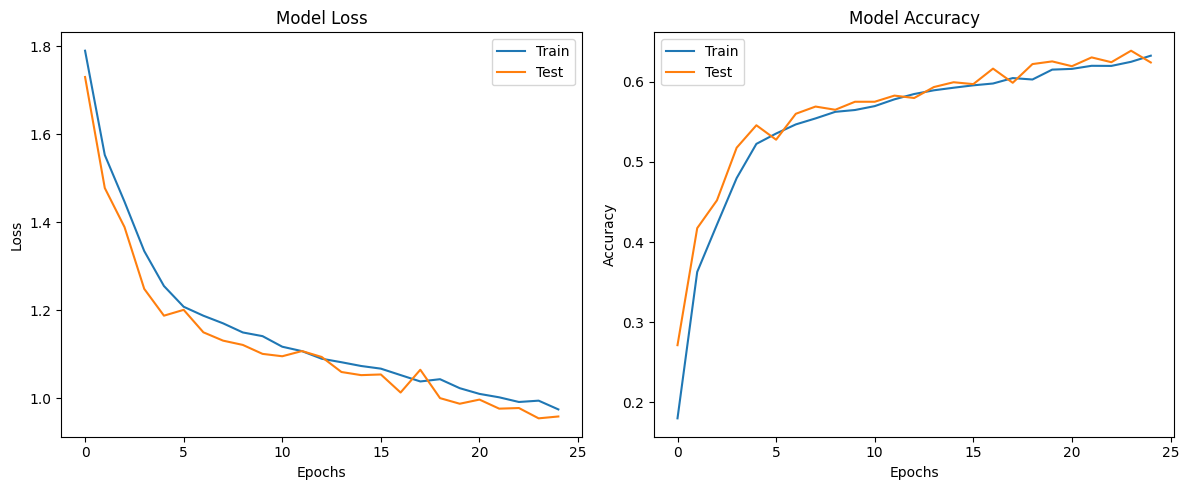

In [13]:
#FernandoSanchez Definición del modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

#FernandoSanchez Compilación del modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#FernandoSanchez Resumen del modelo
model.summary()

#FernandoSanchez Entrenamiento del modelo
history = model.fit(train_X_normalized, train_y_encoded, epochs=25, batch_size=64, 
                    validation_data=(test_X_normalized, test_y_encoded))

#FernandoSanchez Evaluación del modelo
test_loss, test_acc = model.evaluate(test_X_normalized, test_y_encoded, verbose=1)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

#FernandoSanchez Curvas de pérdida y precisión
plt.figure(figsize=(12, 5))

#FernandoSanchez Curva de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#FernandoSanchez Curva de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

"""Precisión en el Conjunto de Prueba: 72.54%
Pérdida en el Conjunto de Prueba: 0.9583"""

4. Implementa una red neuronal Convolucional que mejore la capacidad de
generalización alcanzada en el modelo anterior. Para esto usa 16 o más capas (entre
convolucionales y densas) y mide su rendimiento.
Luego, con el modelo entrenado, aplícalo sobre el conjunto de predicción, mide su
rendimiento y compáralo con el rendimiento calculado en el modelo anterior. ¿Para
qué etiqueta el modelo se equivoca más? Muestra en forma aleatoria ocho imágenes
con la etiqueta de predicción otorgada por el modelo.

Epoch 1/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 83s 366ms/step - accuracy: 0.1735 - loss: 1.7921 - val_accuracy: 0.1750 - val_loss: 1.7904
Epoch 2/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 80s 365ms/step - accuracy: 0.1802 - loss: 1.7915 - val_accuracy: 0.1670 - val_loss: 1.7902
Epoch 3/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 78s 353ms/step - accuracy: 0.1733 - loss: 1.7916 - val_accuracy: 0.1750 - val_loss: 1.7903
Epoch 4/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 92s 420ms/step - accuracy: 0.1859 - loss: 1.7912 - val_accuracy: 0.1750 - val_loss: 1.7905
Epoch 5/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 102s 466ms/step - accuracy: 0.1757 - loss: 1.7911 - val_accuracy: 0.1750 - val_loss: 1.7906
Epoch 6/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 88s 401ms/step - accuracy: 0.1715 - loss: 1.7913 - val_accuracy: 0.1750 - val_loss: 1.7901
Epoch 7/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 84s 382ms/step - accuracy: 0.1811 - loss: 1.7904 - val_accuracy: 0.1750 - val_loss: 1.7902
Epoch 8/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 85s 387ms/step - accuracy: 0.1761 - loss: 

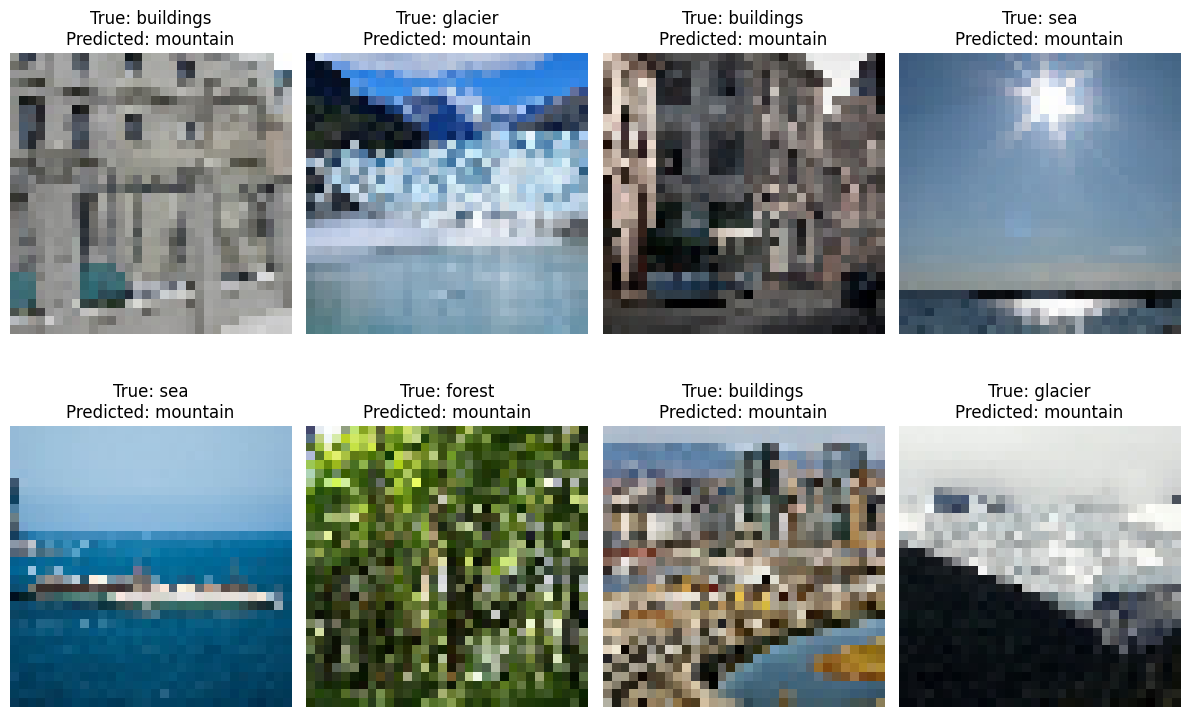

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

#FernandoSanchez Definición del modelo mejorado
improved_model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

#FernandoSanchez Convertir etiquetas a números enteros
label_encoder = LabelEncoder()
train_y_numeric = label_encoder.fit_transform(train_y)
test_y_numeric = label_encoder.transform(test_y)

#FernandoSanchez Asegurar que las etiquetas están codificadas como one-hot
train_y_encoded = to_categorical(train_y_numeric)
test_y_encoded = to_categorical(test_y_numeric)

improved_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_improved = improved_model.fit(train_X_normalized, train_y_encoded, epochs=25, batch_size=64, validation_data=(test_X_normalized, test_y_encoded))

#FernandoSanchez Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = improved_model.evaluate(test_X_normalized, test_y_encoded)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

#FernandoSanchez Entrenamiento del modelo
history_improved = improved_model.fit(train_X_normalized, train_y_encoded, epochs=25, batch_size=64, validation_data=(test_X_normalized, test_y_encoded))

#FernandoSanchez Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = improved_model.evaluate(test_X_normalized, test_y_encoded)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')


import numpy as np
import matplotlib.pyplot as plt

#FernandoSanchez Definir class_names
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

#FernandoSanchez Obtener predicciones del conjunto de prueba
predictions = improved_model.predict(test_X_normalized)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_y_encoded, axis=1)

#FernandoSanchez Encontrar índices de imágenes mal clasificadas
misclassified_indices = np.where(predicted_labels != true_labels)[0]

#FernandoSanchez Mostrar ocho ejemplos de imágenes mal clasificadas aleatorias
plt.figure(figsize=(12, 8))
for i, idx in enumerate(np.random.choice(misclassified_indices, size=8, replace=False)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(test_X[idx])
    plt.title(f'True: {class_names[true_labels[idx]]}\nPredicted: {class_names[predicted_labels[idx]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

"""El modelo se equivoca más en la etiqueta mountain"""